# Paulihedral: A Generalized Block-Wise Compiler Optimization Framework For Quantum Simulation Kernels

## Concent
 1.Introduction to Paulihedral  
 2.The usage of Paulihedral on Qiskit  
 3.How to use Paulihedral on Universal Circuit  
   &#8195; 3.1. The Principle in using Paulihedral on Universal Circuit  
   &#8195; 3.2. How to Achieve It through Qiskit  

## 1. Introduction to Paulihedral  

Paulihedral is a block-wise compiler framework that can deeply optimize this subroutine by exploiting high-level program structure and optimization opportunities. Paulihedral first employs a new Pauli intermediate representation that can maintain the high-level semantics and constraints in quantum simulation kernels. This naturally enables new large-scale optimizations that are hard to implement at the low gate-level. In particular, we propose two technology-independent instruction scheduling passes, and two technology-dependent code optimization passes which reconcile the circuit synthesis, gate cancellation, and qubit mapping stages of the compiler. Experimental results show that Paulihedral can outperform state-of-the-art compiler infrastructures in a wide-range of applications on both near-term superconducting quantum processors and future fault-tolerant quantum computers.
<br>
If you want to know more about Paulihedral, please read the article [1].
<br>
The codes of Paulihedral are (or will be) in the files below
<br>
&#8194;qiskit.transpiler.passes.paulihedral
<br>
&#8194;qiskit.transpiler.paulihedral.py
<br>
&#8194;qiskit.circuit.library.pauli_evolution.py
<br>
<br>
[1]: Paulihedral: a generalized block-wise compiler optimization framework for Quantum simulation kernels https://dl.acm.org/doi/10.1145/3503222.3507715

## 2. Requirements

Install qiskit >0.36 and download files from https://github.com/XiuqiCao/python_files_for_paulihedral_2_1/tree/version_2.
<br>
Place these files in the right path as follow:
<br>
&#8194;qiskit.transpiler.passes.paulihedral
<br>
&#8194;qiskit.transpiler.paulihedral.py
<br>
&#8194;qiskit.circuit.library.pauli_evolution.py

## 3. The usage of Paulihedral on Qiskit

First, we need to import the packages about Paulihedral. All the classes and functions about Paulihedral is imported in qiskit.transpiler.passes.paulihedral.__init__.py. So you can import all python files mentioned in 1., or you can simpily use the code below.

In [1]:
from qiskit.transpiler.passes.paulihedral.block_ordering import *
from qiskit.transpiler.passes.paulihedral.block_compilation import *
from qiskit.transpiler.paulihedral import *
from qiskit.circuit.library.pauli_evolution import *

In addition, you need to import some other packages to initialize the backend and the QuantumCircuit.

In [2]:
from qiskit import QuantumCircuit

from qiskit.providers.fake_provider import FakeTokyo
from qiskit.providers.fake_provider import FakeManilaV2
from qiskit.providers.fake_provider import FakeVigo

Now, you can initialize a pauli evolution kernel.If you print it, you can see that it is just a new kind of gate but it is of high level.
<br>
You can use the class Paulihedral to optimizatize the kernel(pauli evolution kernel) into circuit made of basic gates.

In [3]:
pauliIRprogram = [[['IXYIX', 0.1], ['IYZIY', 0.1], 1.2],[['YIIXZ', 0.1], ['YIXXI', 0.1], 1.4]]
pauliIRprogram = list_to_PauliEvolutionKernel(pauliIRprogram)

pauli_opter=Paulihedral(inputprogram=pauliIRprogram,ordering_method='gco',backend_method='sc',props=FakeVigo().properties())

Now, it is easy to get the final result.

In [4]:
output_circ=pauli_opter.to_circuit()
output_circ.draw(output='mpl')

<Figure size 2210.55x953.167 with 1 Axes>

## 4.The usage of Paulihedral on Qiskit

### 4.1. The Principle in using Paulihedral on Universal Circuit

The process is on the following steps.
<br>
1, Divide the input logical circuit into layers.
<br>
Each layer is of QuantumCircuit class which has the same qubits number compare to the input circuit. It has either a pauli evolutional kernel or several normal gates (gates except pauli evolutional kernel). If we linked all the layers together in order, we will obtain a logical circuit which is equal to the input logical circuit.
<br>
2, Handle each layer and get its layout accroding to its detail
<br>
If it has a pauli evolutional kernel, we will use the class Paulihedral to optimizatize it. And if it is made of basic gates, it will use the function qiskit.compiler.transpile to optimizatize it.
<br>
3, Connect all the layer together and transform the layout between two adjacent layers
<br>
In the previous step, we also get the layout between the logical qubits of the input circuit to the physical qubits of the backend of each layer. In this step, we will connect these layers together. In the connected point, we will use the class qiskit.transpiler.pass.routing.LayoutTransformation to connect 2 circuits which have different layout.

### 4.2. How to Achieve It through Qiskit  

First, we can create a circuit made of pauli evolution kernel and other gates.

In [5]:
input_circuit=QuantumCircuit(12)
input_circuit.cx(2,4)
input_circuit.cx(5,6)
input_circuit.ccx(1,4,7)
input_circuit.append(pauliIRprogram,[0,2,3,4,7])
input_circuit.cx(5,6)
input_circuit.ccx(1,4,7)
input_circuit.append(pauliIRprogram,[1,2,3,4,7])

Then we can use the function Paulihedral_on_mixed_circuit to optimizatize it.
<br>
##### ATTENTION!!!
##### ATTENTION!!!
<br>
In the output circuit, the ancilla qubit may be used in the physical circuit. And the meaning of the q qubit of the output circuit is that they represents the qubit which has the same index in the input logical circuit.

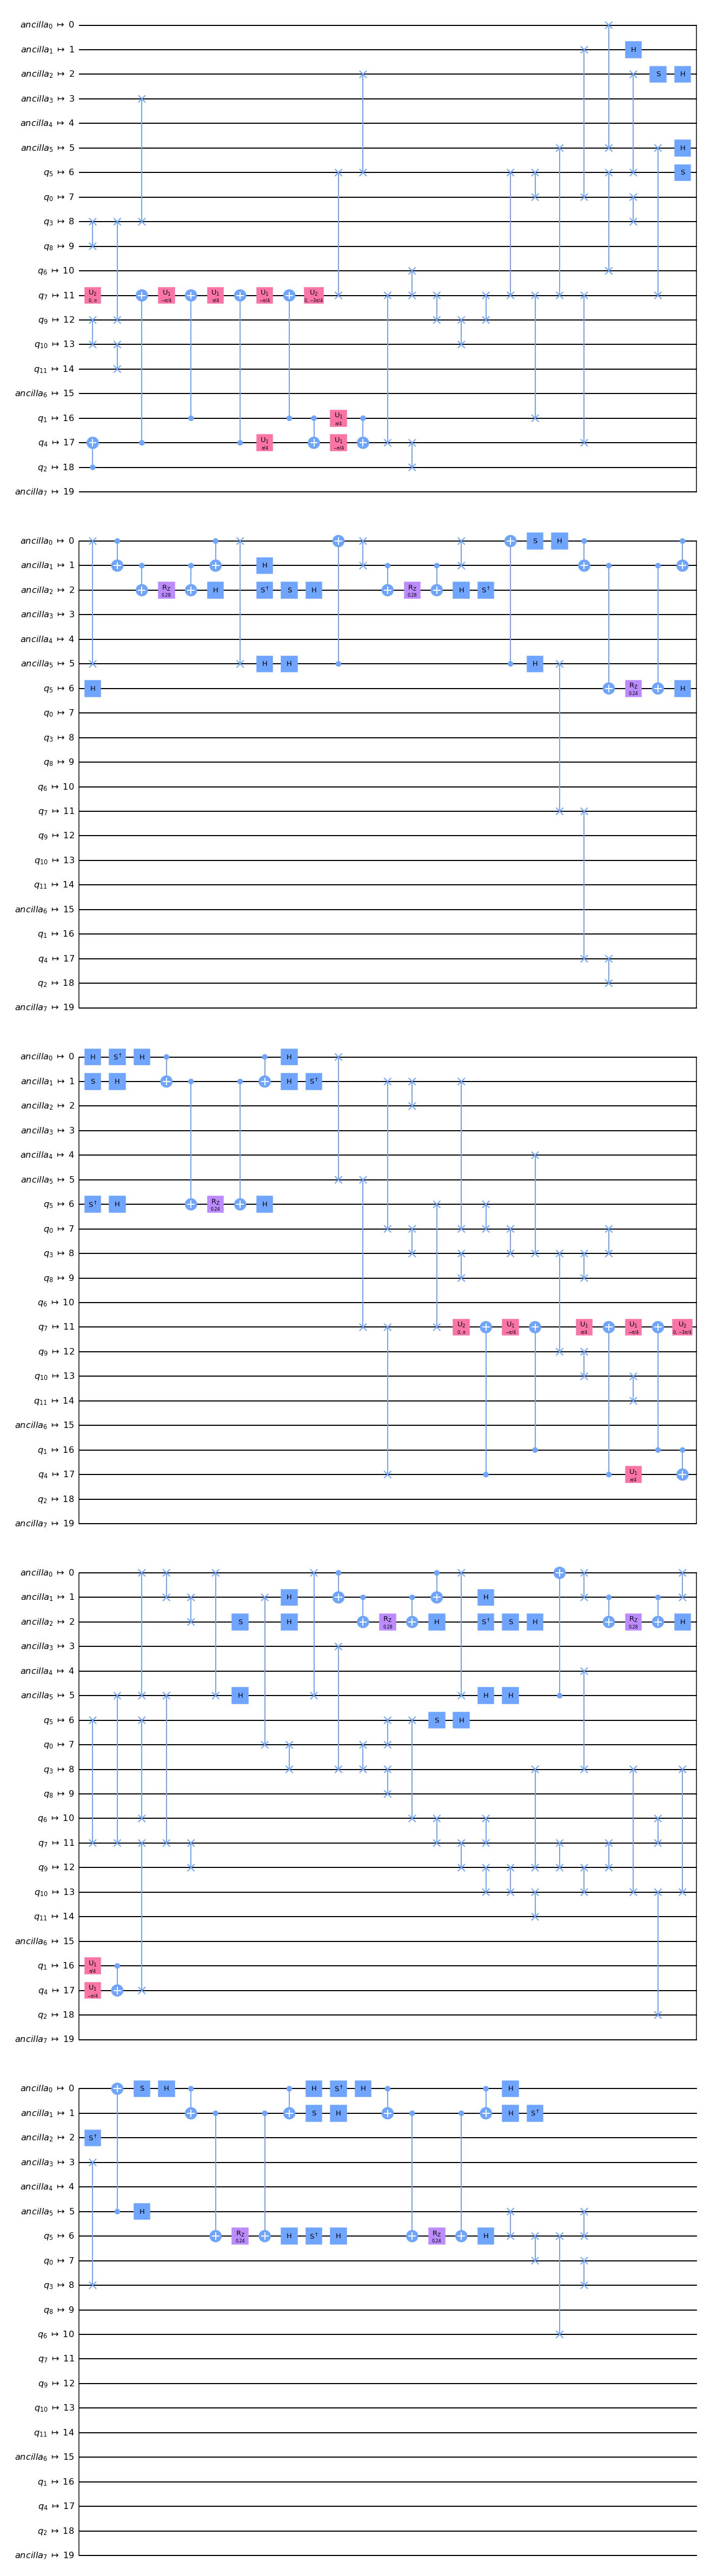

In [6]:
output_circuit=Paulihedral_on_mixed_circuit(
        qc=input_circuit,
        backend=FakeTokyo(),
        ordering_method='do',
        backend_method='sc',
        do_max_iteration=30
)
output_circuit.draw(output='mpl')